In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"F:\datasets\bigmart_data.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Apply Function

In [5]:
# accessing row wise

df.apply(lambda x:x)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
# access first row

df.apply(lambda x:x[0])

Item_Identifier                          FDA15
Item_Weight                                9.3
Item_Fat_Content                       Low Fat
Item_Visibility                       0.016047
Item_Type                                Dairy
Item_MRP                              249.8092
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 1999
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                     3735.138
dtype: object

In [11]:
# access first row by index

df.apply(lambda x: x[0], axis=1)

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Length: 8523, dtype: object

In [15]:
# access by column name

df.apply(lambda x: x['Item_Fat_Content'], axis=1)

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Length: 8523, dtype: object

# Apply function with condition

In [17]:
# before clipping ( reduce the price more than 200 to 200 and below 200 will stay the same)
df['Item_MRP'].iloc[:5]

0    249.8092
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

In [21]:
# after clipping

def clip_price(price):
    if price > 200:
        price = 200
    return price

df['Item_MRP'].apply(lambda x: clip_price(x))[:5]

0    200.0000
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

In [24]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

# Apply function with label encoder

In [32]:
def label_encoder(city):
    if city == 'Tier 1':
        label = 0
    elif city == 'Tier 2':
        label = 1
    else:
        label = 2
    return label

In [28]:
# before encoding

df['Outlet_Location_Type'][:5]

0    Tier 1
1    Tier 3
2    Tier 1
3    Tier 3
4    Tier 3
Name: Outlet_Location_Type, dtype: object

In [33]:
# after encoding
df['Outlet_Location_Type'] =df['Outlet_Location_Type'].apply(label_encoder)

# Aggregating Data

In [3]:
df_new = pd.read_csv(r"F:\datasets\bigmart_data.csv")
df_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# dropping null value
df_new.dropna(how='any', inplace=True)

# Resetting index
df_new.reset_index(drop=True, inplace=True)

df.head()

NameError: name 'df' is not defined

In [38]:
df_new.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Aggregate Data

## 1. Groupby
## 2. Crosstab
## 3. Pivottable

# Groupby

In [6]:
# Group price based on item type

price_by_item = df_new.groupby('Item_Type')
price_by_item.first()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Type,,,,,,,,,,,
Baking Goods,FDP36,10.395,Regular,0.000000,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
Breads,FDW11,12.600,Low Fat,0.048981,61.9194,OUT018,2009,Medium,Tier 3,Supermarket Type2,619.1940
Breakfast,FDP49,9.000,Regular,0.069089,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192
Canned,FDC02,21.350,Low Fat,0.069103,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
Dairy,FDA15,9.300,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
Frozen Foods,FDR28,13.850,Regular,0.025896,165.0210,OUT046,1997,Small,Tier 1,Supermarket Type1,4078.0250
Fruits and Vegetables,FDY07,11.800,Low Fat,0.000000,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
Hard Drinks,DRJ59,11.650,low fat,0.019356,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312
Health and Hygiene,NCB42,11.800,Low Fat,0.008596,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888


In [7]:
# mean price by item

price_by_item.Item_MRP.mean()

Item_Type
Baking Goods             125.795653
Breads                   141.300639
Breakfast                134.090683
Canned                   138.551179
Dairy                    149.481471
Frozen Foods             140.095830
Fruits and Vegetables    145.418257
Hard Drinks              140.102908
Health and Hygiene       131.437324
Household                149.884244
Meat                     140.279344
Others                   137.640870
Seafood                  146.595782
Snack Foods              147.569955
Soft Drinks              130.910182
Starchy Foods            151.256747
Name: Item_MRP, dtype: float64

In [8]:
# group on multiple columns

multiple_groups = df_new[:10].groupby(['Item_Type', 'Item_Fat_Content'])
multiple_groups.first()

Item_Identifier  Item_Weight  \
Item_Type             Item_Fat_Content                                
Baking Goods          Regular                    FDP36       10.395   
Dairy                 Low Fat                    FDA15        9.300   
                      Regular                    FDA03       18.500   
Fruits and Vegetables Low Fat                    FDY07       11.800   
                      Regular                    FDX32       15.100   
Household             Low Fat                    NCD19        8.930   
Meat                  Low Fat                    FDN15       17.500   
Snack Foods           Regular                    FDO10       13.650   
Soft Drinks           Regular                    DRC01        5.920   

                                        Item_Visibility  Item_MRP  \
Item_Type             Item_Fat_Content                              
Baking Goods          Regular                  0.000000   51.4008   
Dairy                 Low Fat                  0.016047  249.8092   
                      Regular                  0.045464  144.1102   
Fruits and Vegetables Low Fat                  0.000000   45.5402   
                      Regular                  0.100014  145.4786   
Household             Low Fat                  0.000000   53.8614   
Meat                  Low Fat                  0.016760  141.6180   
Snack Foods           Regular                  0.012741   57.6588   
Soft Drinks           Regular                  0.019278   48.2692   

                                       Outlet_Identifier  \
Item_Type             Item_Fat_Content                     
Baking Goods          Regular                     OUT018   
Dairy                 Low Fat                     OUT049   
                      Regular                     OUT046   
Fruits and Vegetables Low Fat                     OUT049   
                      Regular                     OUT049   
Household             Low Fat                     OUT013   
Meat                  Low Fat                     OUT049   
Snack Foods           Regular                     OUT013   
Soft Drinks           Regular                     OUT018   

                                        Outlet_Establishment_Year Outlet_Size  \
Item_Type             Item_Fat_Content                                          
Baking Goods          Regular                                2009      Medium   
Dairy                 Low Fat                                1999      Medium   
                      Regular                                1997       Small   
Fruits and Vegetables Low Fat                                1999      Medium   
                      Regular                                1999      Medium   
Household             Low Fat                                1987        High   
Meat                  Low Fat                                1999      Medium   
Snack Foods           Regular                                1987        High   
Soft Drinks           Regular                                2009      Medium   

                                       Outlet_Location_Type  \
Item_Type             Item_Fat_Content                        
Baking Goods          Regular                        Tier 3   
Dairy                 Low Fat                        Tier 1   
                      Regular                        Tier 1   
Fruits and Vegetables Low Fat                        Tier 1   
                      Regular                        Tier 1   
Household             Low Fat                        Tier 3   
Meat                  Low Fat                        Tier 1   
Snack Foods           Regular                        Tier 3   
Soft Drinks           Regular                        Tier 3   

                                              Outlet_Type  Item_Outlet_Sales  
Item_Type             Item_Fat_Content                                        
Baking Goods          Regular           Supermarket Type2           556.6088  
Dairy        

# Crosstab

In [9]:
# Crosstab for outlet size and outlet location type

pd.crosstab(df_new['Outlet_Size'], df_new['Outlet_Location_Type'], margins=True)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3,All
Outlet_Size,,,,
High,0,0,932,932
Medium,930,0,928,1858
Small,930,930,0,1860
All,1860,930,1860,4650


# Pivottable

In [11]:
pd.pivot_table(df_new, index=['Outlet_Establishment_Year'], values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Establishment_Year,
1987,2298.995256
1997,2277.844267
1999,2348.354635
2004,2438.841866
2009,1995.498739


In [12]:
df_new.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
# statistics function in pivot table

pd.pivot_table(df_new, index=['Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'], values='Item_Outlet_Sales',
                aggfunc=[np.mean, np.median, min, max, np.std, np.var])

,,,mean,median,min,max,std,var
,,,Item_Outlet_Sales,Item_Outlet_Sales,Item_Outlet_Sales,Item_Outlet_Sales,Item_Outlet_Sales,Item_Outlet_Sales
Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,,,,,,
1987,Tier 3,Supermarket Type1,2298.995256,2050.6640,73.2380,10256.6490,1533.531664,2.351719e+06
1997,Tier 1,Supermarket Type1,2277.844267,1945.8005,101.8674,9779.9362,1488.405631,2.215351e+06
1999,Tier 1,Supermarket Type1,2348.354635,1966.1074,111.8544,7646.0472,1513.289464,2.290045e+06
2004,Tier 2,Supermarket Type1,2438.841866,2109.2544,113.8518,8479.6288,1538.512533,2.367021e+06
2009,Tier 3,Supermarket Type2,1995.498739,1655.1788,69.2432,6768.5228,1375.932889,1.893191e+06


In [15]:
pd.pivot_table(df_new, index=['Item_Type'], values='Item_Weight')

,Item_Weight
Item_Type,
Baking Goods,12.336923
Breads,11.190000
Breakfast,12.649397
Canned,12.304557
Dairy,13.504276
Frozen Foods,12.854832
Fruits and Vegetables,13.196813
Hard Drinks,11.449060
Health and Hygiene,13.274946


In [21]:
mean_df = df_new.groupby('Item_Type')
mean_df.Item_Weight.mean()

Item_Type
Baking Goods             12.336923
Breads                   11.190000
Breakfast                12.649397
Canned                   12.304557
Dairy                    13.504276
Frozen Foods             12.854832
Fruits and Vegetables    13.196813
Hard Drinks              11.449060
Health and Hygiene       13.274946
Household                13.634347
Meat                     12.743009
Others                   13.749286
Seafood                  13.360909
Snack Foods              12.983643
Soft Drinks              11.886328
Starchy Foods            13.722586
Name: Item_Weight, dtype: float64

# Visualizations

# Matplotlib

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 1.Line chart 
### Whats the mean price per item

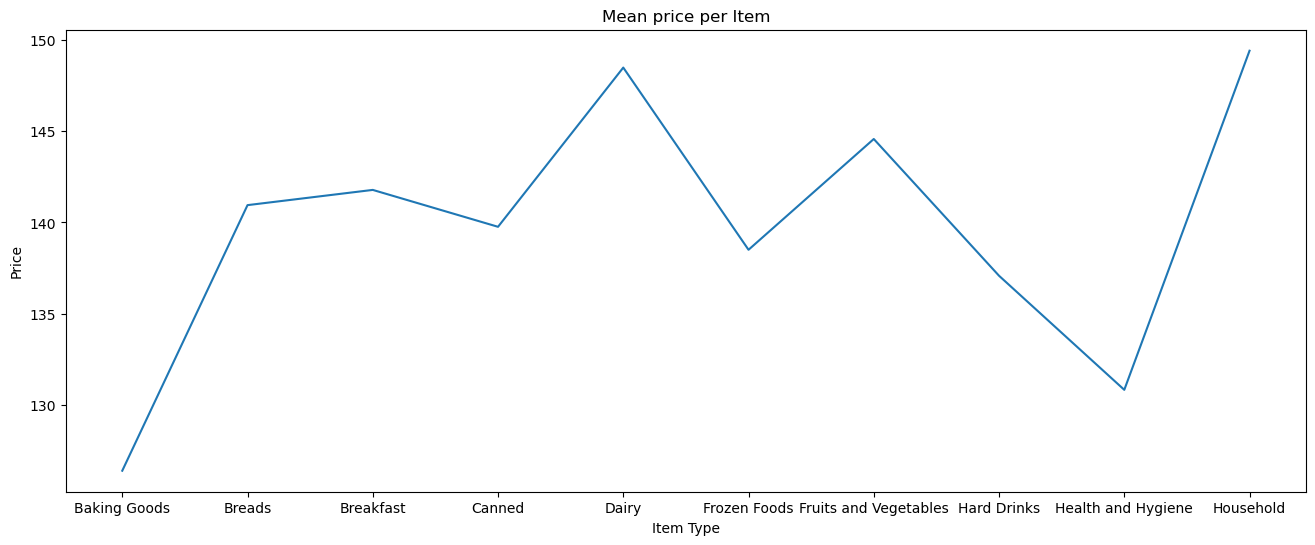

In [28]:
# mean price based on item type

price_by_item = df.groupby('Item_Type').Item_MRP.mean()[:10]

x = price_by_item.index.tolist()
y = price_by_item.values.tolist()

plt.figure(figsize=(16,6))

plt.title("Mean price per Item")
plt.xlabel("Item Type")
plt.ylabel("Price")

plt.xticks(labels=x, ticks=np.arange(len(x,)))

plt.plot(x,y)

## 2.Bar chart
### What is the mean sales of each outlet size?

<BarContainer object of 3 artists>

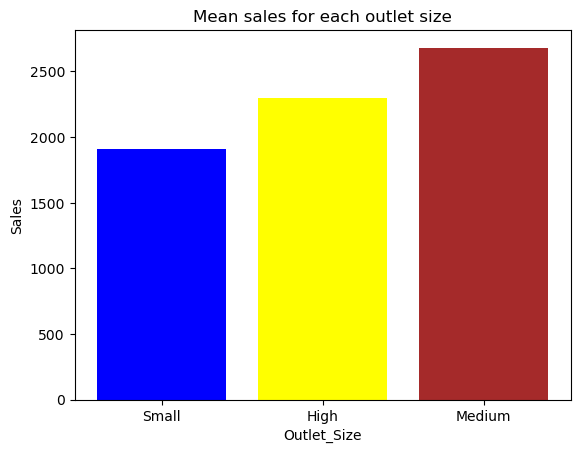

In [4]:
mean_sales = df.groupby('Outlet_Size').Item_Outlet_Sales.mean()

# sort by sales

mean_sales.sort_values(inplace=True)

x = mean_sales.index.tolist()
y = mean_sales.values.tolist()

plt.xlabel('Outlet_Size')
plt.ylabel('Sales')
plt.title('Mean sales for each outlet size')
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x, y, color=['Blue', 'Yellow', 'Brown'])

## 3.Histogram
### Distribution of item price

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

(array([0.00449202, 0.00470118, 0.00413346, 0.0015737 , 0.00475098,
        0.00573704, 0.00617528, 0.00625496, 0.00293824, 0.00506971,
        0.00577688, 0.00515935, 0.0061952 , 0.00575696, 0.00226095,
        0.00251991, 0.00301792, 0.00252987, 0.0026992 , 0.0031474 ]),
 array([ 31.29   ,  43.06992,  54.84984,  66.62976,  78.40968,  90.1896 ,
        101.96952, 113.74944, 125.52936, 137.30928, 149.0892 , 160.86912,
        172.64904, 184.42896, 196.20888, 207.9888 , 219.76872, 231.54864,
        243.32856, 255.10848, 266.8884 ]),
 <BarContainer object of 20 artists>)

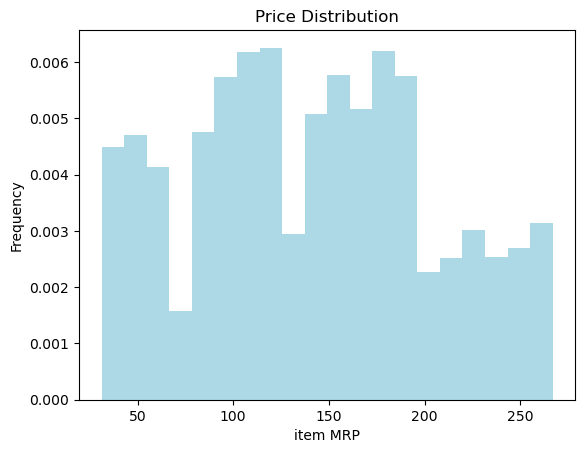

In [9]:
plt.title('Price Distribution')
plt.xlabel('item MRP')
plt.ylabel('Frequency')

plt.hist(df['Item_MRP'], bins=20, color='Lightblue', density=True)

## 4.BoxPlot
### Distribution and outliers of Item outlet sales

<AxesSubplot:>

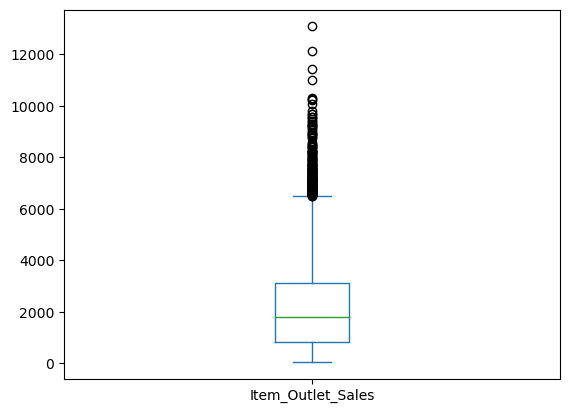

In [10]:
df['Item_Outlet_Sales'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0xf1da7435e0>,
 'caps': [<matplotlib.lines.Line2D at 0xf1da743b80>,
 'boxes': [<matplotlib.lines.Line2D at 0xf1da743310>],
 'medians': [<matplotlib.lines.Line2D at 0xf1da74f160>],
 'fliers': [<matplotlib.lines.Line2D at 0xf1da74f430>],
 'means': []}

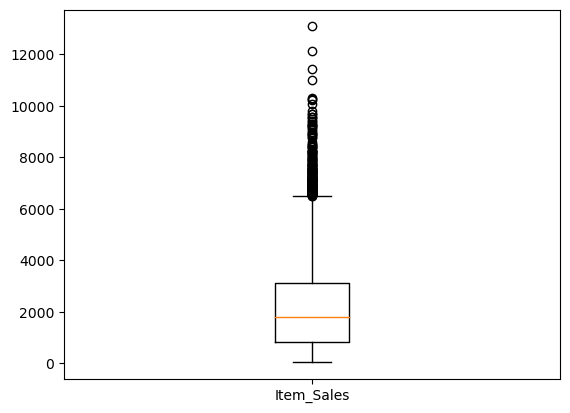

In [20]:
outlet_sales_item = df[['Item_Outlet_Sales']]

plt.boxplot(outlet_sales_item.values, labels=['Item_Sales'])

In [18]:
outlet_sales_item.values

array([[3735.138 ],
       [ 443.4228],
       [2097.27  ],
       ...,
       [1193.1136],
       [1845.5976],
       [ 765.67  ]])

{'whiskers': [<matplotlib.lines.Line2D at 0x21849a6f10>,
 'caps': [<matplotlib.lines.Line2D at 0x21849b84f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21849a6c40>,
 'medians': [<matplotlib.lines.Line2D at 0x21849b8a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x21849b8d60>,
 'means': []}

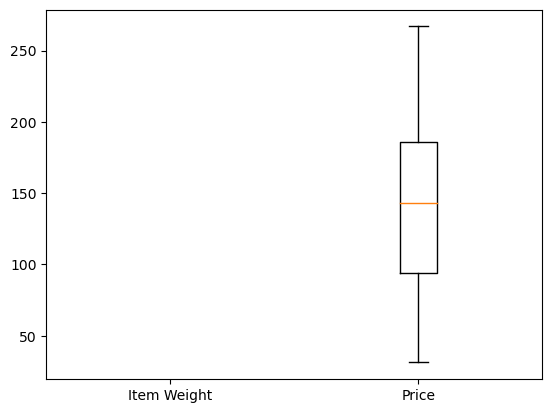

In [13]:
box_data = df[['Item_Weight', 'Item_MRP']]

fig, ax = plt.subplots()

plt.boxplot(box_data.values, labels=['Item Weight', 'Price'])

In [14]:
box_data.head()

,Item_Weight,Item_MRP
0,9.30,249.8092
1,5.92,48.2692
2,17.50,141.6180
3,19.20,182.0950
4,8.93,53.8614


<AxesSubplot:>

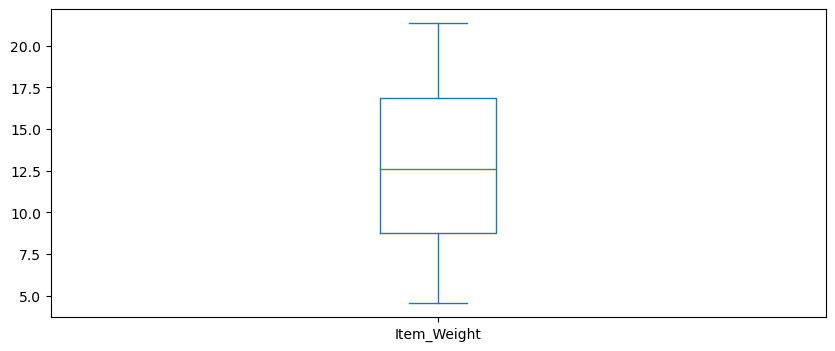

In [9]:
df['Item_Weight'].plot(kind='box', figsize=(10,4))

C:\Users\Gokul\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


{'bodies': [<matplotlib.collections.PolyCollection at 0x2184a343a0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2184a342e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2184a34e20>,
 'cbars': <matplotlib.collections.LineCollection at 0x2184a85250>}

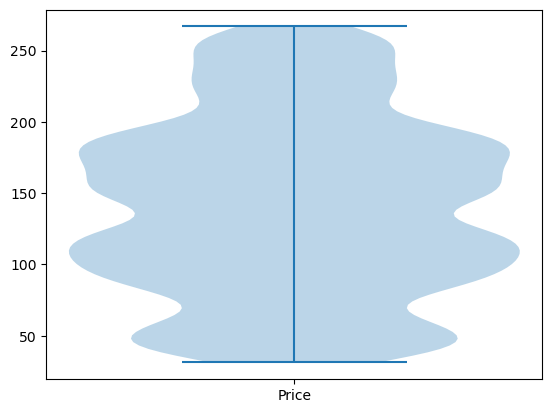

In [16]:
vio_data = df[['Item_Weight', 'Item_MRP']]

fig, ax = plt.subplots()

plt.xticks(ticks=[1,2], labels=['Item weight', 'Price'])

plt.violinplot(vio_data.values)

## 5.Scatterplots

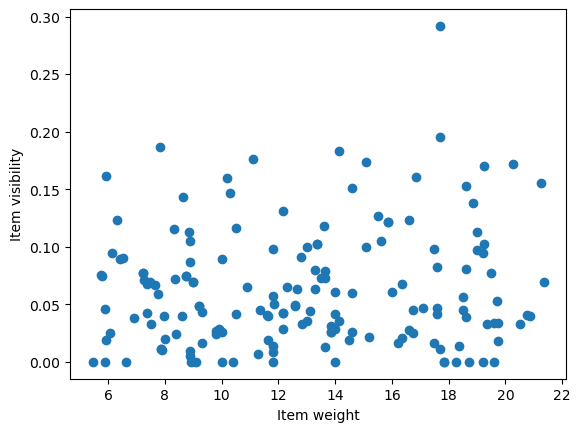

In [18]:
plt.xlabel('Item weight')
plt.ylabel('Item visibility')

plt.scatter(df['Item_Weight'][:200], df['Item_Visibility'][:200])

## 6.Bubble plots
### Distribution of sales, item price, item visibility

In [20]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

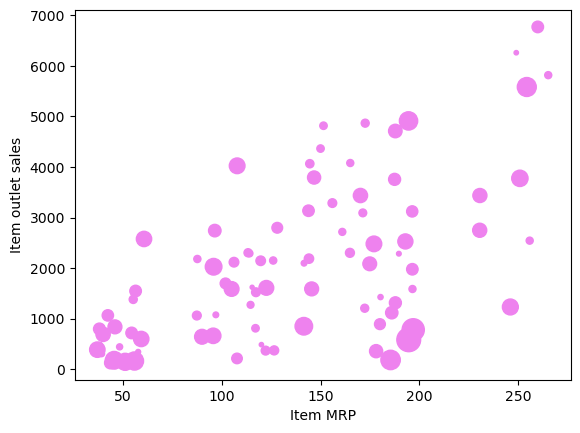

In [4]:
plt.xlabel('Item MRP')
plt.ylabel('Item outlet sales')

plt.scatter(df['Item_MRP'][:100], df['Item_Outlet_Sales'][:100], s=df['Item_Visibility'][:100]*1000, c='violet')

# Seaborn
## Seaborn is a more advanced library compared to matplotlib. It gives more options and intergrates with pandas and it takes only a few line of code to print a graph compared to matplotlib.

## It automatically gives the x and y axis labels

## 1.Linechart

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>

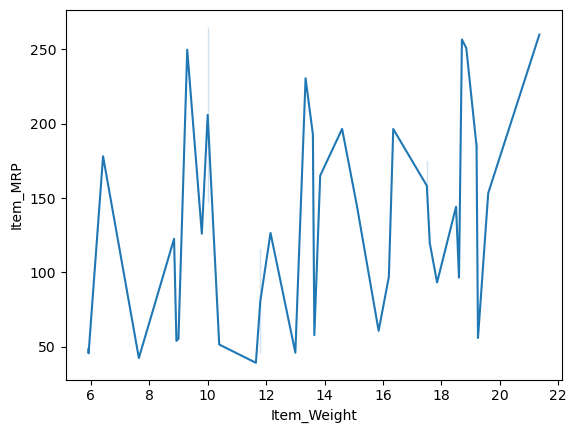

In [5]:
sns.lineplot(x='Item_Weight', y='Item_MRP', data=df[:50])

## 2.Barchart

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

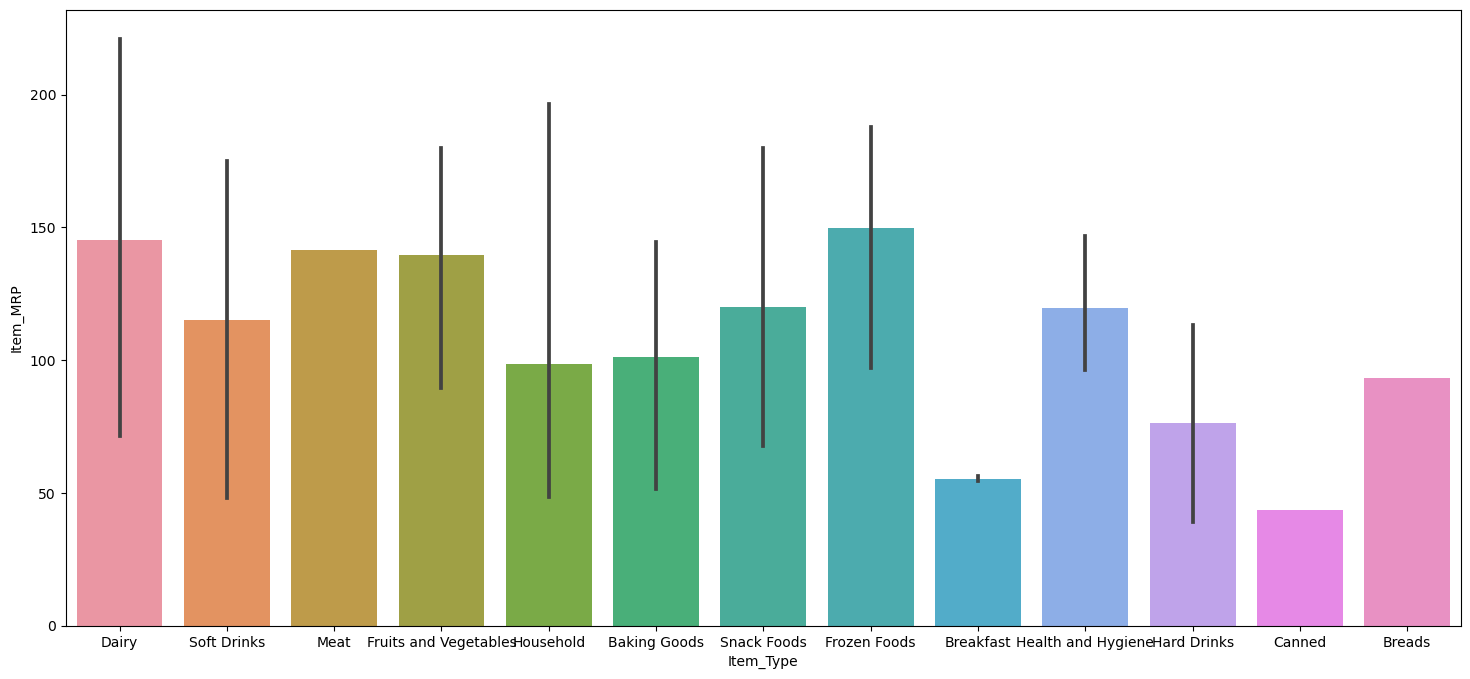

In [8]:
plt.subplots(figsize=(18,8))

sns.barplot(x='Item_Type', y='Item_MRP', data=df[:40])

plt.show()

## 3.Histogram

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

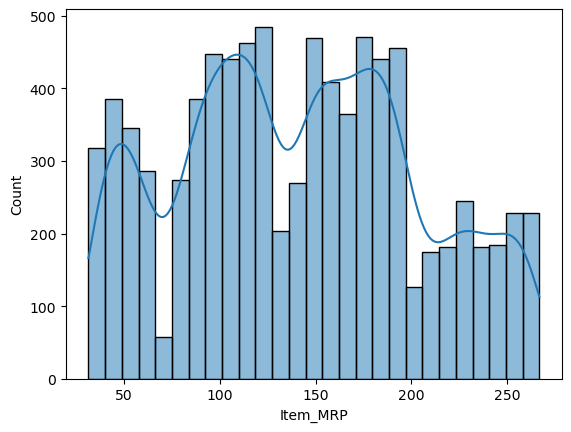

In [11]:
sns.histplot(df['Item_MRP'], kde=True)

## 4.Boxplot

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Item_Outlet_Sales'>

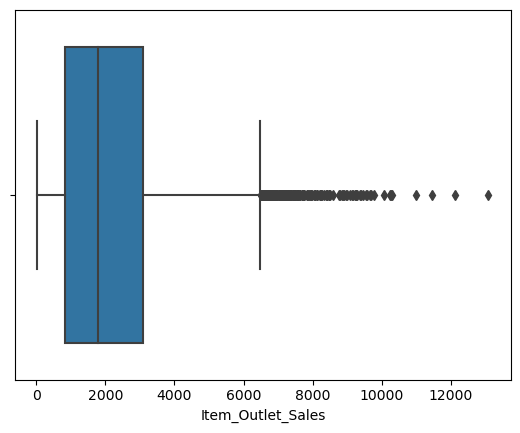

In [16]:
sns.boxplot(df['Item_Outlet_Sales'], orient='vertical')

## 5.Violinplot

<AxesSubplot:xlabel='Item_Outlet_Sales'>

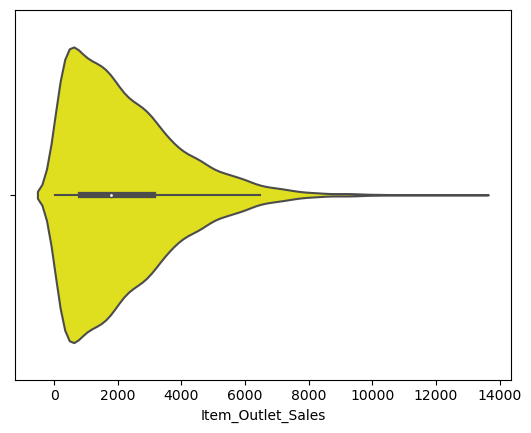

In [25]:
sns.violinplot(df['Item_Outlet_Sales'], orient='vertical', color='yellow')

## 6.Scatterplot
### Relation plot

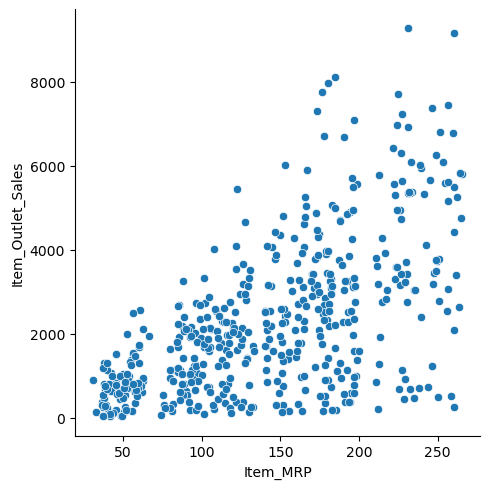

In [27]:
sns.relplot(x='Item_MRP', y='Item_Outlet_Sales', data=df[:500], kind='scatter')

## Hue semantic
### Adding a third variable and analyze the relationship between three variables on a 3 dimension.

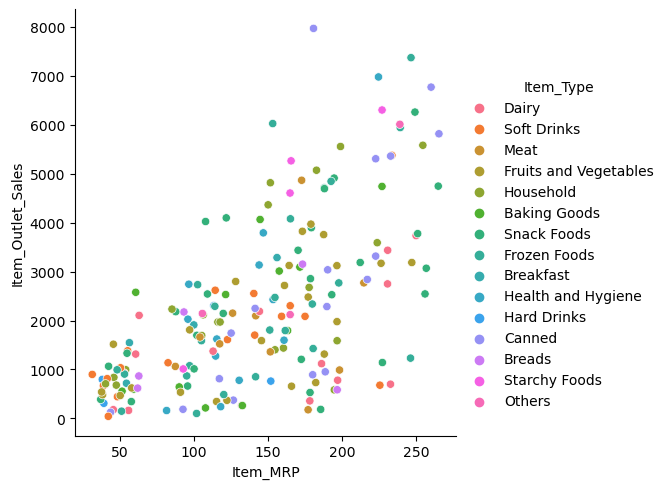

In [29]:
sns.relplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Type', data=df[:200])

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>

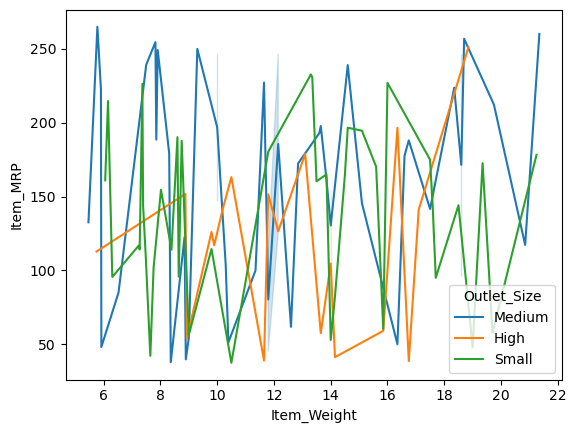

In [31]:
sns.lineplot(x='Item_Weight', y='Item_MRP', hue='Outlet_Size', data=df[:200])

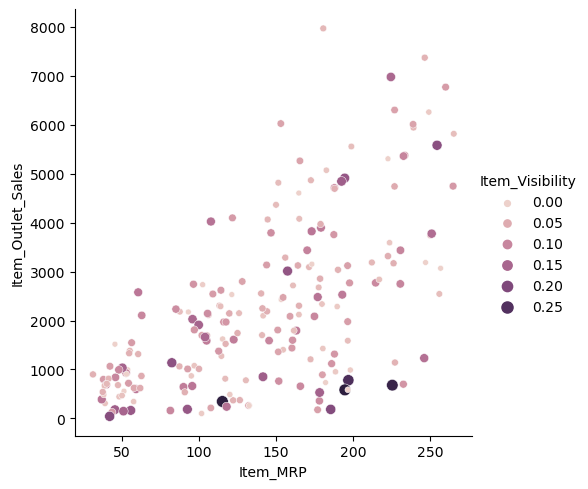

In [36]:
sns.relplot(x='Item_MRP', y='Item_Outlet_Sales', data=df[:200], kind='scatter', size='Item_Visibility', hue='Item_Visibility')

In [35]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

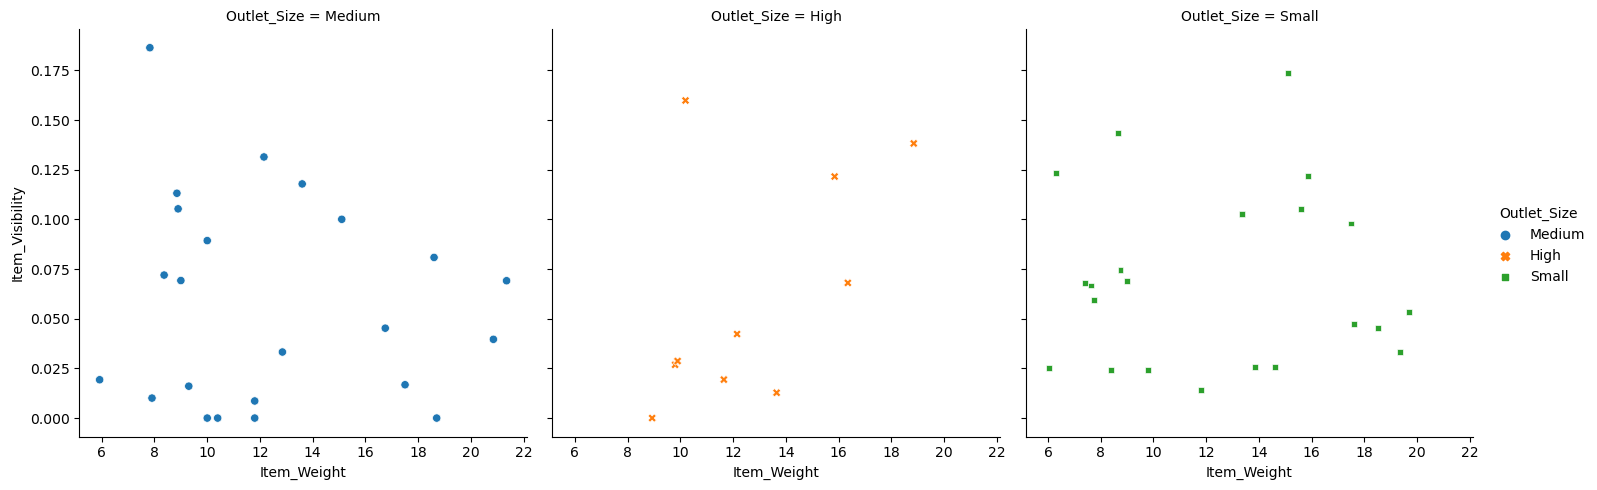

In [4]:
sns.relplot(x='Item_Weight', y='Item_Visibility', hue='Outlet_Size', style='Outlet_Size', col='Outlet_Size', data=df[:100])

#  1.Advance categorical plots in seaborn

For categorical variables we have three different families in seaborn.

* **Categorical scatterplots:**

 * stripplot() (with kind="strip"; the default)
 * swarmplot() (with kind="swarm")

* **Categorical distribution plots:**

 * boxplot() (with kind="box")
 * violinplot() (with kind="violin")
 * boxenplot() (with kind="boxen")

* **Categorical estimate plots:**

 * pointplot() (with kind="point")
 * barplot() (with kind="bar")

# Scatterplot


**The default representation of catplot() uses a scatterplot**

### Strip plot
- Draws a scatterplot where one variable is categorical and other is continuous.
- kind=strip()

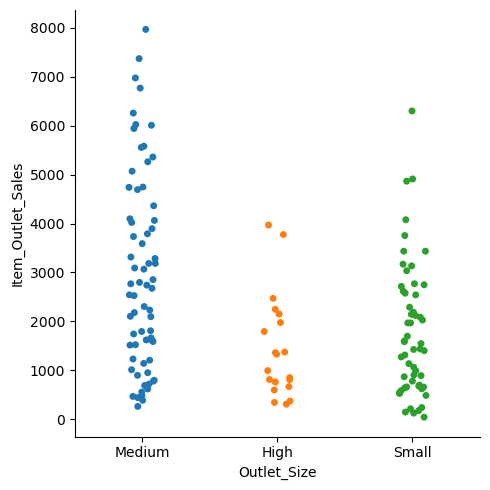

In [6]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', kind='strip', data=df[:200])

## Swarm plot
- This function is similar to `stripplot()`, but the points are adjusted (only along the categorical axis) so that they don’t overlap. 
- This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a “beeswarm”.
- You can create this by passing **kind=swarm** in the `catplot()`.

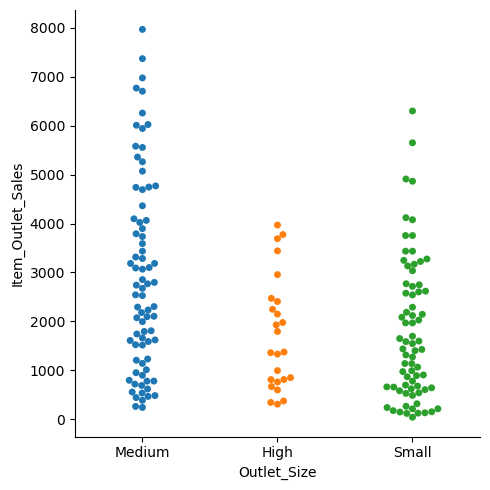

In [9]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', kind='swarm', data=df[:250])

# 1.Categorical distribution plot

**Box plot**
- It shows 3 quartile ranges along with extreme values.

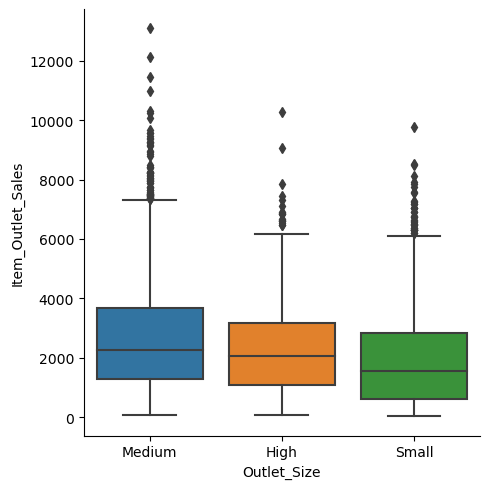

In [10]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', kind='box', data=df)

## Violin plotss

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

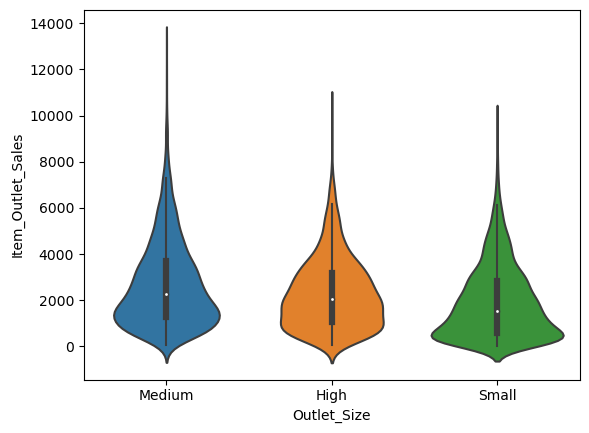

In [11]:
sns.violinplot(x='Outlet_Size', y='Item_Outlet_Sales', kind='violin', data=df)

## Barplot

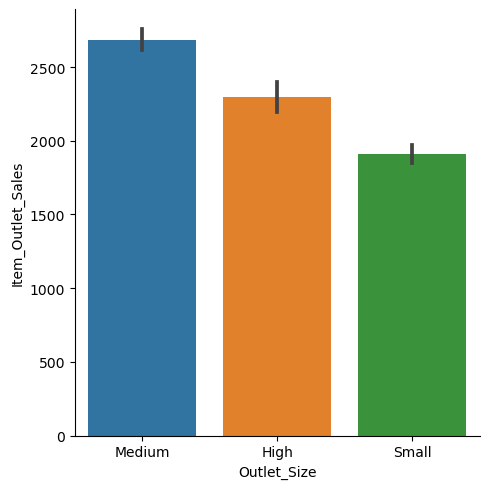

In [19]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', kind='bar', data=df)

## Boxen plot

In [17]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

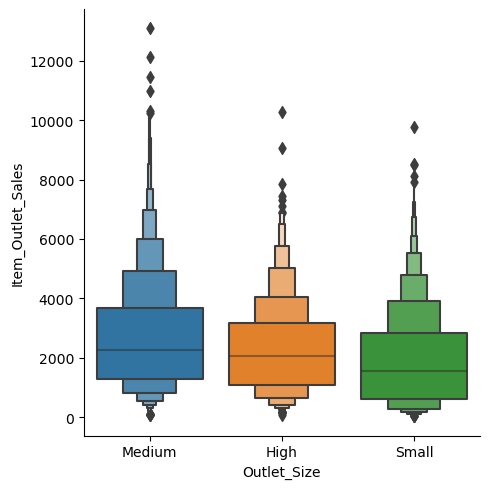

In [20]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', kind='boxen', data=df)

## Point plot

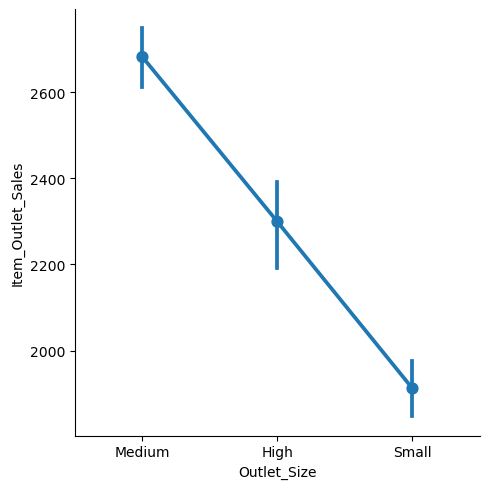

In [21]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', kind='point', data=df)

## Density plot

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

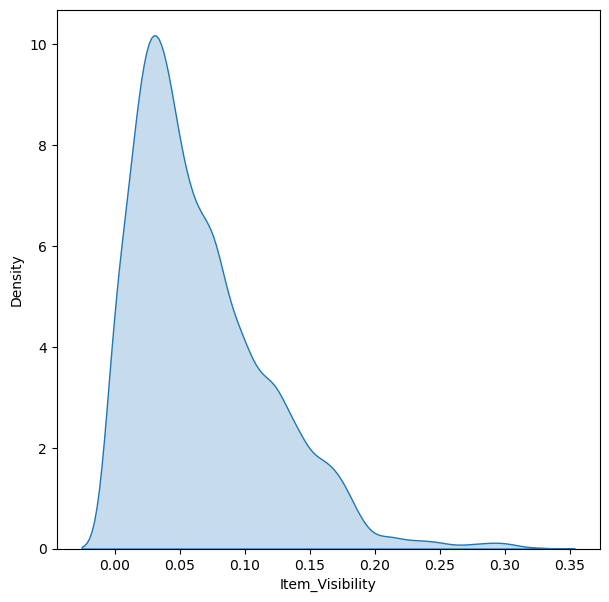

In [25]:
plt.figure(figsize=(7,7))
sns.kdeplot(df['Item_Visibility'], shade=True)